In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Settings for 4000 rows
num_rows = 4000

data = {
    'Product_ID': range(1001, 1001 + num_rows),
    'Product_Name': [f"Zara_Item_{i}" for i in range(num_rows)],
    'Category': [random.choice(['Outerwear', 'Tops', 'Bottoms', 'Dresses', 'Accessories']) for _ in range(num_rows)],
    'Sub_Category': [random.choice(['Blazers', 'Shirts', 'Knitwear', 'T-shirts', 'Jeans', 'Trousers', 'Maxi', 'Mini']) for _ in range(num_rows)],
    'Material': [random.choice(['Linen', 'Cotton', 'Wool', 'Polyester', 'Silk', 'Denim']) for _ in range(num_rows)],
    'Color': [random.choice(['Black', 'White', 'Beige', 'Navy', 'Red', 'Pastel Pink', 'Emerald Green']) for _ in range(num_rows)],
    'Size': [random.choice(['S', 'M', 'L', 'XL', 'XXL']) for _ in range(num_rows)],
    'Season': [random.choice(['SS25', 'AW24', 'Summer_Essential']) for _ in range(num_rows)],
    'Original_Price': [random.randint(29, 199) for _ in range(num_rows)],
    'Discount_Percent': [random.choice([0, 10, 20, 30, 50]) for _ in range(num_rows)],
    'Stock_on_Hand': [random.randint(0, 500) for _ in range(num_rows)],
    'Stock_Received_Date': [(datetime.now() - timedelta(days=random.randint(1, 120))).strftime('%Y-%m-%d') for _ in range(num_rows)],
    'Warehouse_Location': [random.choice(['Madrid', 'Delhi', 'New York', 'Paris', 'Dubai']) for _ in range(num_rows)],
    'Supplier_Name': [random.choice(['Global_Tex', 'EuroFashion_Logistics', 'Inditex_Supply_Co']) for _ in range(num_rows)],
    'Trend_Score': [random.randint(1, 10) for _ in range(num_rows)],
    'Lead_Time_Days': [random.randint(7, 45) for _ in range(num_rows)],
    'Units_Sold_Last_30_Days': [random.randint(0, 800) for _ in range(num_rows)],
    'Return_Rate_Percent': [round(random.uniform(2.0, 15.0), 2) for _ in range(num_rows)]
}

df = pd.DataFrame(data)
# Calculate Current Price based on Discount
df['Current_Price'] = df['Original_Price'] * (1 - df['Discount_Percent']/100)

# Save to CSV
df.to_csv('zara_inventory_data.csv', index=False)
print("Success! 4000 rows generated in 'zara_inventory_data.csv'")

Success! 4000 rows generated in 'zara_inventory_data.csv'


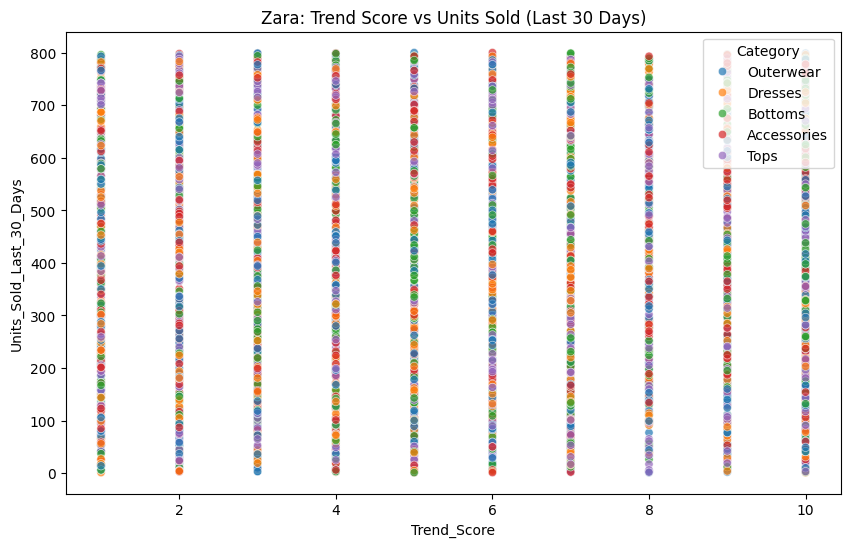

C:\Users\Muskan Rathore\AppData\Local\Temp\ipykernel_6404\2169781041.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Stock_on_Hand', palette='Set2')


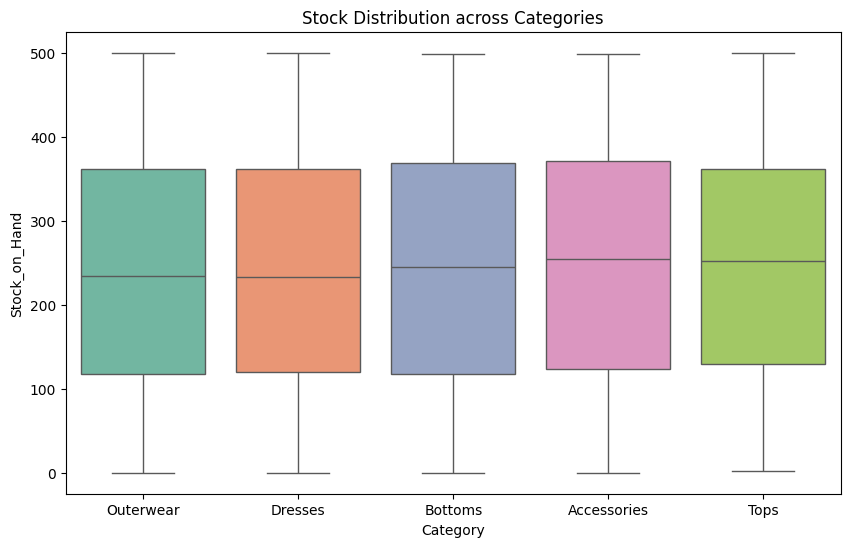

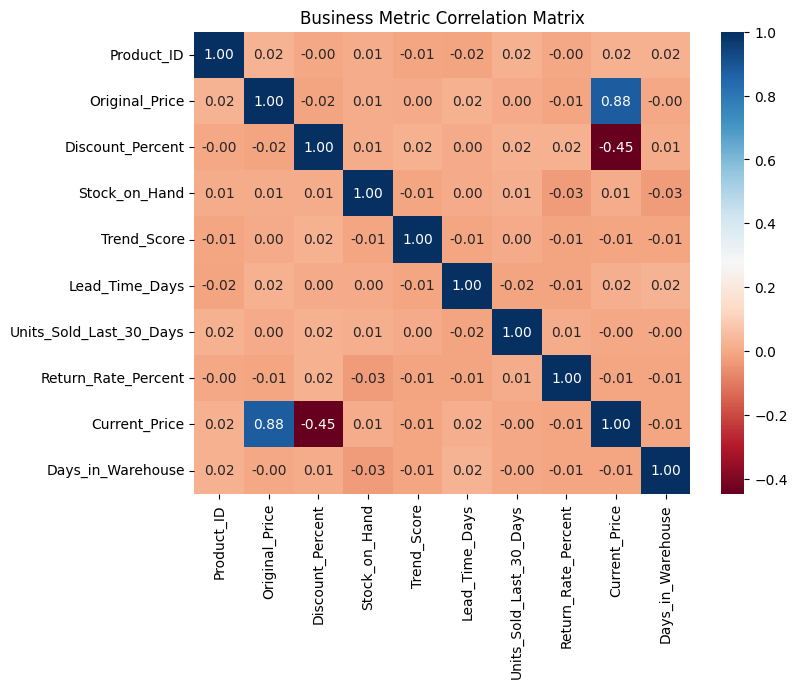

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Load karein
df = pd.read_csv('zara_inventory_data.csv')

# 2. Inventory Aging Analysis (Python Logic)
df['Stock_Received_Date'] = pd.to_datetime(df['Stock_Received_Date'])
today = pd.to_datetime('today')
df['Days_in_Warehouse'] = (today - df['Stock_Received_Date']).dt.days

# 3. Visual 1: Trend vs Sales (Professional Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Trend_Score', y='Units_Sold_Last_30_Days', hue='Category', alpha=0.7)
plt.title('Zara: Trend Score vs Units Sold (Last 30 Days)')
plt.show()

# 4. Visual 2: Category-wise Stock Value (Box Plot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Stock_on_Hand', palette='Set2')
plt.title('Stock Distribution across Categories')
plt.show()

# 5. Visual 3: Correlation Heatmap (Advanced Insight)
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Business Metric Correlation Matrix')
plt.show()